# Prelude
Importing modules and loading mata

In [2]:
import numpy as np
import pandas as pd
import pathlib as pl

In [3]:
# matplotlib setup
import matplotlib.pyplot as plt
#%matplotlib widget
plt.style.use('bmh')

In [4]:
DATA_PATH = "../data/raw"
def read_data(subdir: str):
    data = [x for x in (pl.Path(DATA_PATH)/subdir).iterdir() if x.suffix == ".csv"]
    data = [pd.read_csv(d) for d in data]
    data = pd.concat(data)
    data["timestamp"] = pd.to_datetime(data["timestamp"])
    return data[["timestamp", "differential_potential_CH1", "differential_potential_CH2", "transpiration"]]

data_temp = read_data("exp_Temperature")
data_wind = read_data("exp_Wind")

In [5]:
display(data_temp.head(3))
display(data_wind.head(3))
print(f"data types:\n\nTemperature:\n\n{data_temp.dtypes}\n\nWind:\n{data_wind.dtypes}")

,timestamp,differential_potential_CH1,differential_potential_CH2,transpiration
0,2022-01-22 13:53:42,526487,467544,442
1,2022-01-22 13:53:44,526542,467315,461
2,2022-01-22 13:53:45,526532,466868,466


,timestamp,differential_potential_CH1,differential_potential_CH2,transpiration
0,2022-01-22 13:53:37,505940,507749,621
1,2022-01-22 13:53:38,505846,507807,632
2,2022-01-22 13:53:40,505990,507764,629


data types:

Temperature:

timestamp                     datetime64[ns]
differential_potential_CH1             int64
differential_potential_CH2             int64
transpiration                          int64
dtype: object

Wind:
timestamp                     datetime64[ns]
differential_potential_CH1             int64
differential_potential_CH2             int64
transpiration                          int64
dtype: object


# Direct Visualization

In [18]:
import matplotlib as mpl

mpl.rcParams["font.size"] = 32
def plot_differential_potential(dfs: list[(pd.DataFrame, str)]):
    fig, axs = plt.subplots(len(dfs),1, sharex=True)
    fig.set_dpi(72)
    fig.set_size_inches(25,10)
    fig.suptitle("Differential Potentials")
    fig.supylabel("differential potential")
    fig.supxlabel("timestamp")
    [[axs[i].scatter(df["timestamp"].tolist(), df[channel].tolist(),s=1, label=channel) for channel in ["differential_potential_CH1","differential_potential_CH2"]] for (i, (df, _)) in enumerate(dfs)]
    for i, (_, name) in enumerate(dfs):
        axs[i].set_title(name)
        axs[i].legend(scatterpoints=10)
    fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.show()

def plot_transpiration(dfs: list[(pd.DataFrame, str)]):
    fig, axs = plt.subplots(len(dfs),1,sharex=True)
    if type(axs) != np.ndarray:
        axs=[axs]
    fig.set_dpi(72)
    fig.set_size_inches(25,10)
    [axs[i].scatter(df["timestamp"].tolist(), df["transpiration"].tolist(),s=1, label=name) for (i, (df, name)) in enumerate(dfs)]
    for i, (_, name) in enumerate(dfs):
        axs[i].set_title(name)
    fig.suptitle("Transpiration Data")
    fig.supxlabel("timestamp")
    fig.supylabel("Transpirations")
    fig.tight_layout(rect=[0.03, 0.03, 1, 0.95])
    plt.show()

## Plot Complete Timewindow

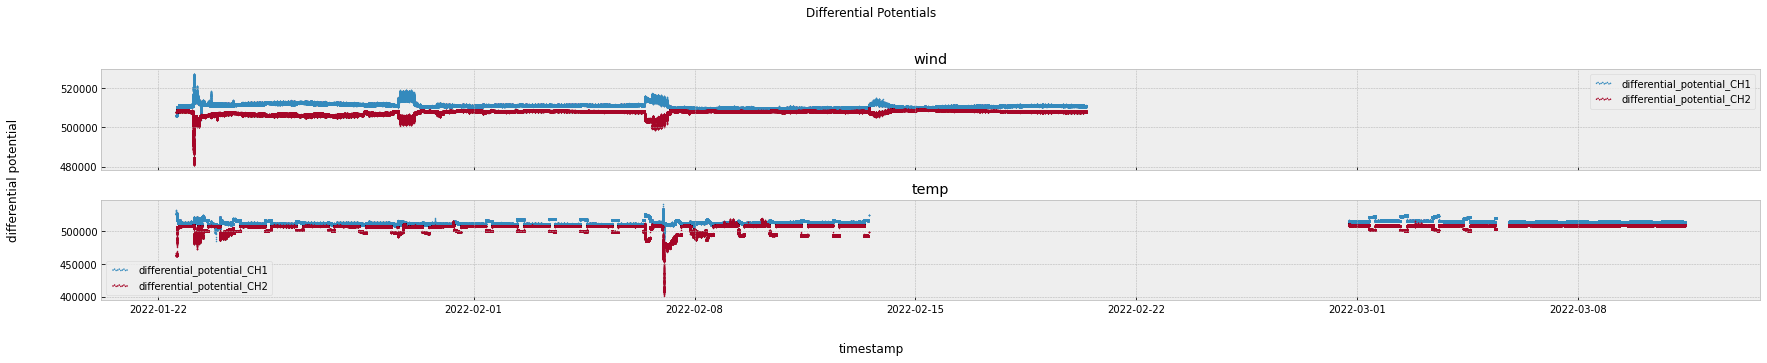

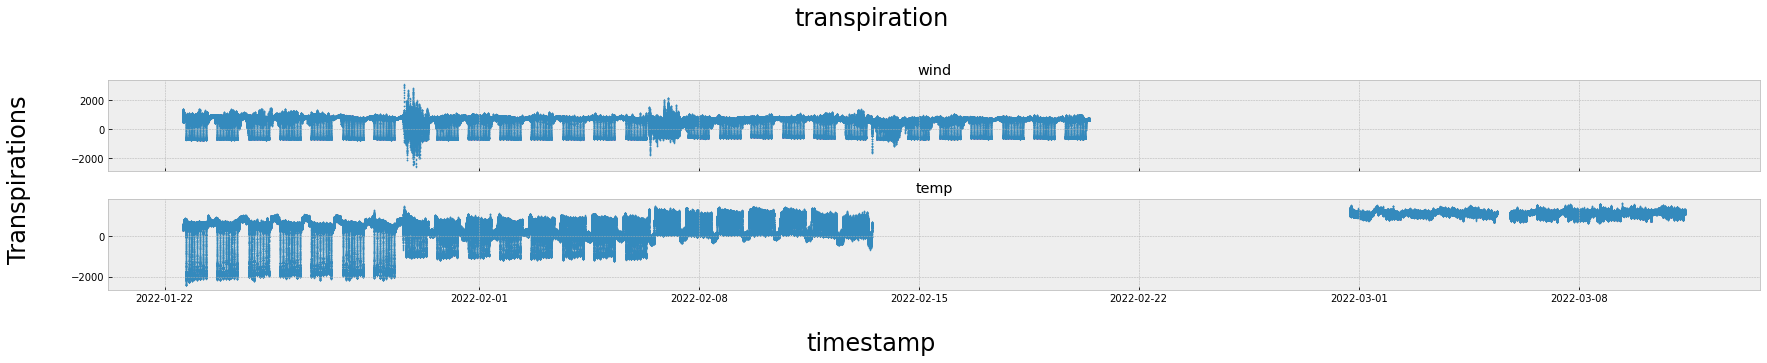

In [7]:
#takes 1-2 minutes
plot_differential_potential([(data_wind, "wind"), (data_temp, "temp")])
plot_transpiration([(data_wind, "wind"), (data_temp, "temp")])

## Plot Typical Day

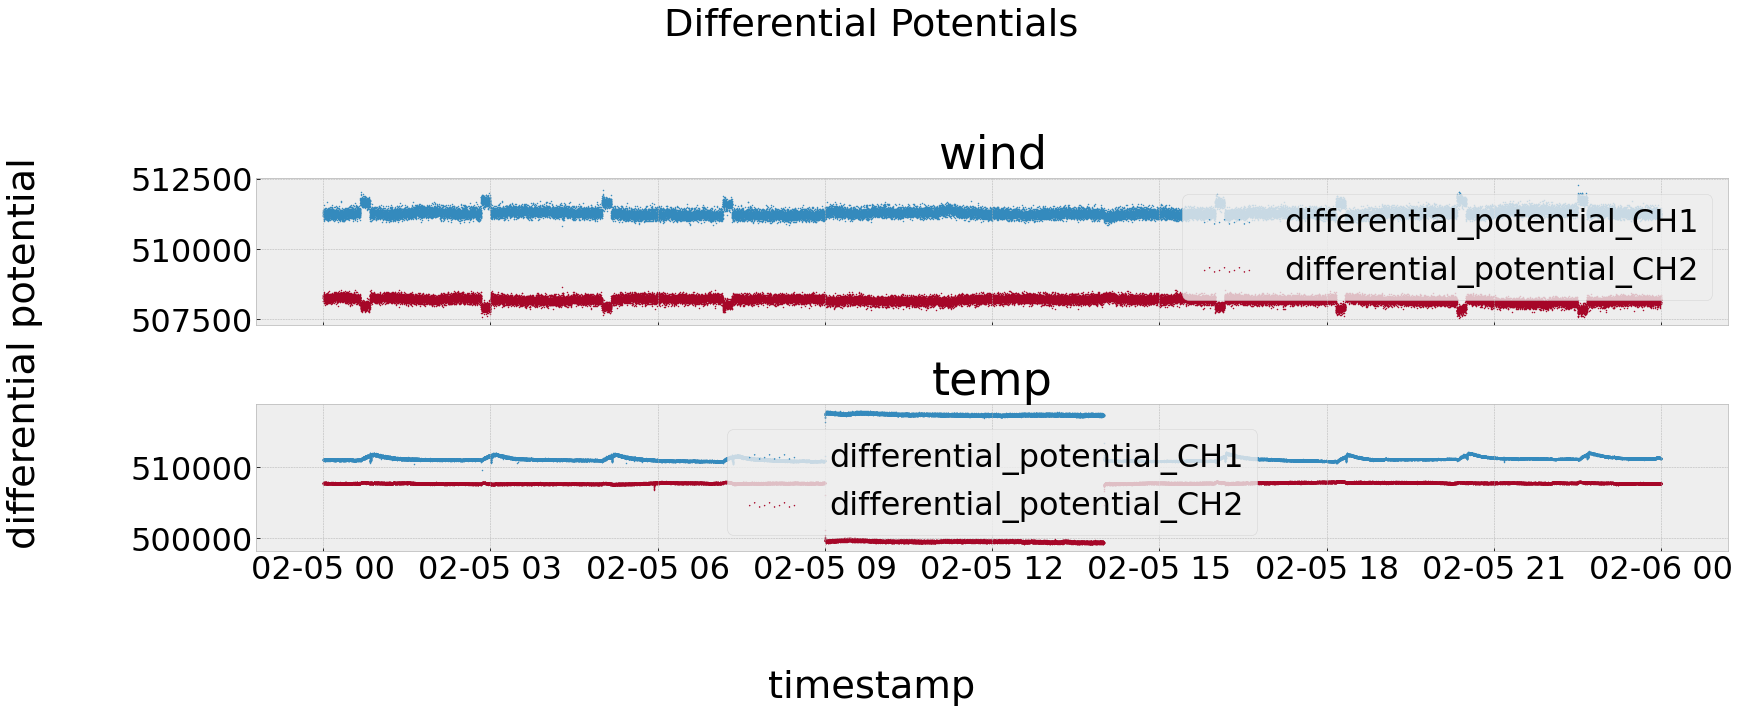

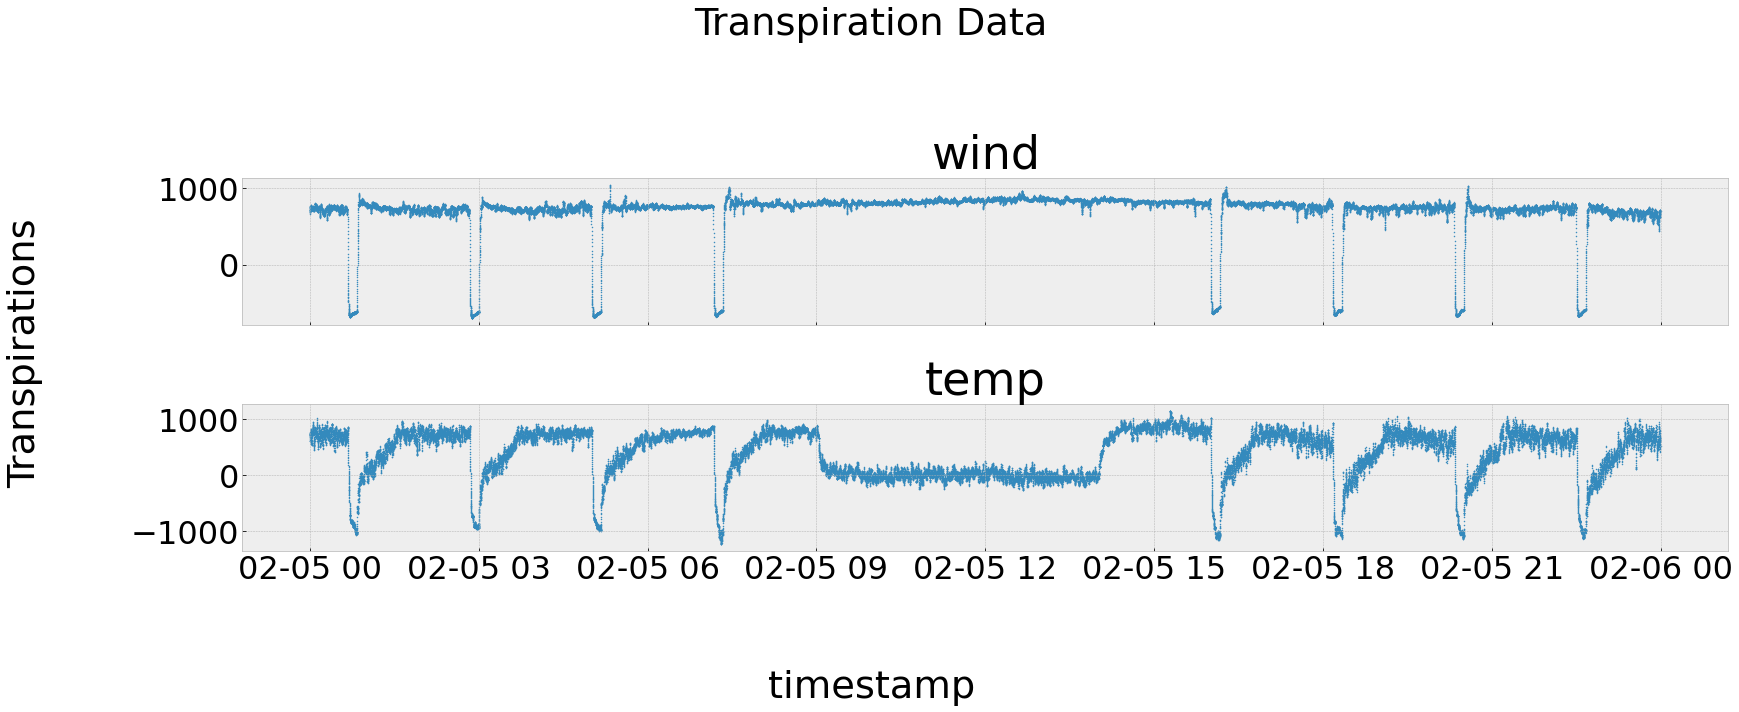

In [19]:

dt_start = "2022-02-05"
dt_end = "2022-02-06"
dt_data_wind = data_wind[data_wind["timestamp"].between(dt_start,dt_end)]
dt_data_temp = data_temp[data_temp["timestamp"].between(dt_start,dt_end)]
plot_differential_potential([(dt_data_wind, "wind"), (dt_data_temp, "temp")])
plot_transpiration([(dt_data_wind, "wind"), (dt_data_temp, "temp")])